<a href="https://colab.research.google.com/github/MeerkatCode589/Project/blob/main/sentimentanalysis_disney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=e0b173fce2c3bc99c622ca1a2b32d14e6702427329a491eb1e27ecf0fcc67a7c
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.6 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':128}
tweet_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
data = ["I love you", "I hate you"]
tweet_model(data, **tokenizer_kwargs)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POS', 'score': 0.9916695356369019},
 {'label': 'NEG', 'score': 0.9806600213050842}]

In [ ]:
import csv

csv_file_path = '/content/disney19670_tweets_nocomma.csv'

target_column = 'tweets'

# Read the CSV file and extract the tweets
tweets = []
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    original_header = csv_reader.fieldnames
    for row in csv_reader:
        tweets.append(row[target_column])

# Process the data using the model and get the results as a list of dictionaries
output_data = tweet_model(tweets, **tokenizer_kwargs)

# Update the original CSV file with new headers and values
output_csv_file = 'tweets_with_sentiment.csv'
header = original_header + ['sentiment', 'score']

with open(csv_file_path, 'r') as csv_input_file:
    with open(output_csv_file, 'w', newline='') as csv_output_file:
        csv_reader = csv.reader(csv_input_file)
        csv_writer = csv.writer(csv_output_file)

        # Write the updated header
        csv_writer.writerow(header)

        # Skip the header row in the input file
        next(csv_reader)

        # Extend each row with the values from the output_data list
        for row, result in zip(csv_reader, output_data):
            new_row = row + [result['label'], result['score']]
            csv_writer.writerow(new_row)

print(f"Data with processed values saved to {output_csv_file}")

Data with processed values saved to tweets_with_sentiment.csv


In [ ]:
!pip install -q transformers tweepy wordcloud matplotlib


In [ ]:
import pandas as pd

# Read the CSV file with the appropriate encoding
file_path = '/content/tweets_with_sentiment.csv'



In [ ]:
disneysentiment_df = pd.read_csv(file_path)

In [ ]:
disneysentiment_df.head(10)

,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
0,@BabeBro,can we get a remake or any game where i can play as a mermaid next gen littlemermaid disneyplus i played this game down nintendo,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 11:58:00,get remake game play mermaid next gen littlemermaid disneyplus played game nintendo,NEU,0.645472
1,@A3predict,disney i am happy the little mermaid live action did not do well why you don t spoil the legacy of some movies because of political correctness we know mermaid don t exist but we are all familiar with ariel being white not black yet you changed that to get,Little Mermaid since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 11:11:00,disney happy little mermaid live action well spoil legacy movies political correctness know mermaid exist familiar ariel white black yet changed get,NEU,0.657121
2,@MartinScholes01,sounds like the latest woke disney remake of the little mermaid,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 08:49:00,sounds like latest woke disney remake little mermaid,NEU,0.894926
3,@zoyajanelotts,thelittlemermaid the little mermaid tlm disney normal girl sza so is ctrl princess ariel prince eric eriel ericariel jalle arieleric halle bailey jonah hauer king edit fc fancam flounder sebastian scuttle vanessa ursula trend editing,https://twitter.com/search?f=live&q=ariel%20halle%20bailey%20disney%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 06:23:00,thelittlemermaid little mermaid tlm disney normal girl sza ctrl princess ariel prince eric eriel ericariel jalle arieleric halle bailey jonah hauer king edit fc fancam flounder sebastian scuttle vanessa ursula trend editing,NEU,0.938735
4,@AlwaysVeryCold,the latest disney remake of the little mermaid,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 05:28:00,latest disney remake little mermaid,NEU,0.881873
5,@MickeyL27321664,this time i incarnated as the heroine of the live action version of the disney movie little mermaid ariel disney chose the african american singer halle bailey to play the role of the little mermaid because of her black complexion it s not easy to be released at early,https://twitter.com/search?f=live&q=ariel%20halle%20bailey%20disney%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 04:28:00,time incarnated heroine live action version disney movie little mermaid ariel disney chose african american singer halle bailey play role little mermaid black complexion easy released early,NEU,0.908919
6,@JacquelineDamr5,this movie is so bad they should have casted characters closer to the original characters then trying to throw the black race into every thing this didn t work the little mermaid s box office letdown looks even worse compared to other disney remake screenrant com the little me,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 02:26:00,movie bad casted characters closer original characters trying throw black race every thing work little mermaid box office letdown looks even worse compared disney remake screenrant com little,NEG,0.980142
7,@Flickreel,well dreamworks did it they made a better little mermaid remake than disney our review of rubygillman flickreel com ruby gillman t,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,28-06-2023 23:21:00,well dreamworks made better little mermaid remake disney review rubygillman flickreel com ruby gillman,POS,0.977561
8,@NSpake,well dreamworks did it they made a better little mermaid remake than disney my review of rubygillman flickreel

In [ ]:
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# run the sentiment analysis on each tweet
tweets = []

for tweet in disneysentiment_df:
    try:
        content = tweet.full_text
        sentiment = sentiment_analysis(content)
        tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})
    except:
        pass


In [ ]:
import pandas as pd

# Load the data in a dataframe
df = pd.DataFrame(disneysentiment_df)
pd.set_option('display.max_colwidth', None)

# Show a tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))


,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
7,@Flickreel,well dreamworks did it they made a better little mermaid remake than disney our review of rubygillman flickreel com ruby gillman t,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,28-06-2023 23:21:00,well dreamworks made better little mermaid remake disney review rubygillman flickreel com ruby gillman,POS,0.977561


,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
0,@BabeBro,can we get a remake or any game where i can play as a mermaid next gen littlemermaid disneyplus i played this game down nintendo,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 11:58:00,get remake game play mermaid next gen littlemermaid disneyplus played game nintendo,NEU,0.645472


,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
6,@JacquelineDamr5,this movie is so bad they should have casted characters closer to the original characters then trying to throw the black race into every thing this didn t work the little mermaid s box office letdown looks even worse compared to other disney remake screenrant com the little me,https://twitter.com/search?f=live&q=little%20mermaid%20remake&src=typed_query since:2022-01-01 lang:en @Disney Little Mermaid,29-06-2023 02:26:00,movie bad casted characters closer original characters trying throw black race every thing work little mermaid box office letdown looks even worse compared disney remake screenrant com little,NEG,0.980142


In [ ]:
# Calculate sentiment value counts
sentiment_counts = disneysentiment_df['sentiment'].value_counts()

# Print the sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

In [ ]:
import pandas as pd

negative_keywords = ['bad', 'woke', 'not good', 'spoil', 'nonotreally', 'sales', 'attention', 'mission', 'desantis', 'bill', 'transgender', 'virtue', 'signal', 'florida', 'forced', 'asia', 'ban', 'appropriation', 'ruin', 'lost', 'rotten', 'lacking', 'identity', 'attention', 'failure', 'china', 'backlash', 'blame', 'propaganda', 'wokeness', 'broke','gowokegobroke', 'mess', 'trap', 'woke mob', 'porn', 'fake', 'loss', 'poor', 'liberals', 'left', 'liberal', 'flop', 'controversy', 'terrible', 'problem', 'bias', 'diversity', 'worse', 'agenda', 'swap', 'race', 'esg', 'dei', 'cancel', 'blm', 'cleopatra', 'weird', 'political', 'changed', 'disappointed', 'unhappy', 'terrible', 'awful']

# Iterate through the DataFrame and update sentiment labels based on keywords
for index, row in disneysentiment_df.iterrows():
    tweet = row['tweets']
    if any(keyword in tweet for keyword in negative_keywords):
        disneysentiment_df.loc[index, 'sentiment'] = 'NEG'

# Update the sentiment counts
sentiment_counts = disneysentiment_df['sentiment'].value_counts()

# Print sentiment counts
print("Updated Sentiment Counts:")
print(sentiment_counts)


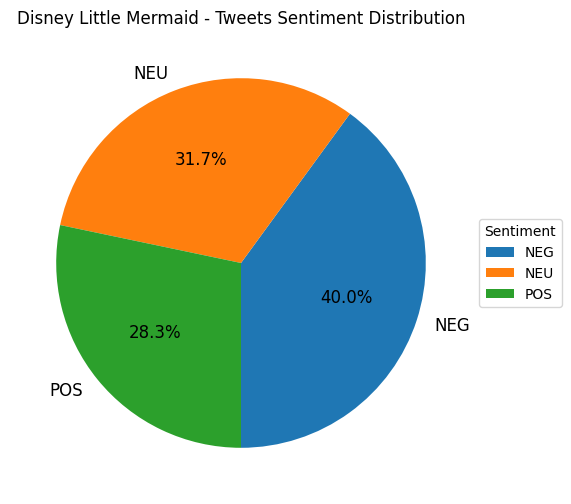

In [ ]:
# Calculate sentiment counts
sentiment_counts = disneysentiment_df['sentiment'].value_counts()

# visualize the sentiments
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

# Add labels
ax.legend(labels=sentiment_counts.index, title='Sentiment', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Disney Little Mermaid - Tweets Sentiment Distribution')
plt.ylabel('')

# Show the pie chart
plt.show()








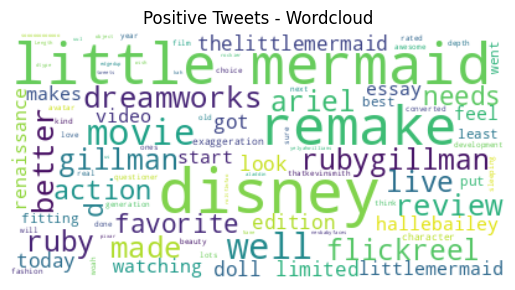

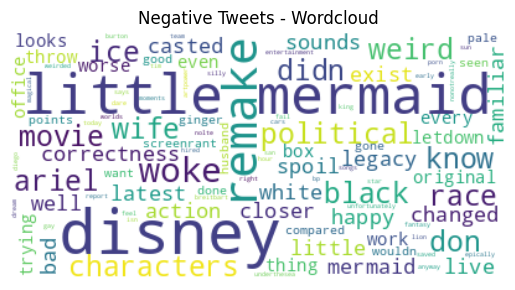

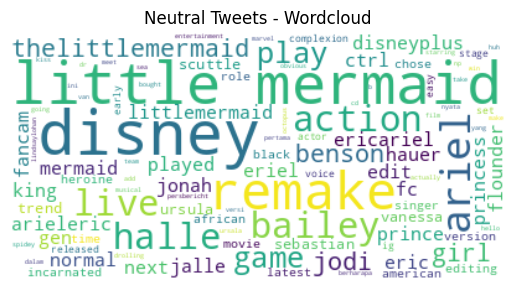

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

unwanted_words = ['projectsegfau', 'watch', 't', 'yet', 'nintendo', 'sza', 'tlm', 'mooney','zjvq', 'roberts', 'paul', 'lt', 'v', 'dlvr', 'cal', 's', 'rudj', 'ede', 'told', 'srspmq', 'xd', 'said', 'invidious', 'people', 'com', 'x', 'series', 'let', 'would', 'via', 'alone', 'los', 'youtube', 'snyder', 'kathleen', 'ly']

# Wordcloud with positive tweets
positive_tweets = disneysentiment_df['tweets'][disneysentiment_df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS) + unwanted_words
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('positive_wordcloud.png', dpi=300)  # Save the positive wordcloud as a PNG file
plt.show()

# Wordcloud with negative tweets
negative_tweets = disneysentiment_df['tweets'][disneysentiment_df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS) + unwanted_words
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('negative_wordcloud.png', dpi=300)  # Save the negative wordcloud as a PNG file
plt.show()

# Wordcloud with neutral tweets
neutral_tweets = disneysentiment_df['tweets'][disneysentiment_df["sentiment"] == 'NEU']
stop_words = ["https", "co", "RT"] + list(STOPWORDS) + unwanted_words
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('neutral_wordcloud.png', dpi=300)  # Save the neutral wordcloud as a PNG file
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'timestamp' column to a datetime type
disneysentiment_df['timestamp'] = pd.to_datetime(disneysentiment_df['timestamp'])

# Filter the data for the first 6 months in 2023
filtered_disneysentiment_df = disneysentiment_df[(disneysentiment_df['timestamp'].dt.year == 2023) & (disneysentiment_df['timestamp'].dt.month <= 6)]

# Sentiment Heatmap
sentiment_counts = filtered_disneysentiment_df['sentiment'].value_counts()

# Create a pivot table with counts of each sentiment by month
sentiment_pivot = pd.pivot_table(filtered_disneysentiment_df, index=filtered_disneysentiment_df['timestamp'].dt.month, columns='sentiment', aggfunc='size', fill_value=0)

# Sort months in chronological order
sentiment_pivot = sentiment_pivot.sort_index()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Sentiment Heatmap (First 6 Months of 2023)')
plt.xlabel('Sentiment')
plt.ylabel('Months')
plt.show()


# Save the heatmap plot as a PNG file
fig.savefig('heatmap_plot.png', dpi=300)


In [ ]:
import matplotlib.pyplot as plt

# Save the heatmap plot as a PNG file
fig.savefig('heatmap_plot.png', dpi=300)

# Save the heatmap plot as a JPEG file with a higher quality (optional)
fig.savefig('heatmap_plot.jpg', dpi=600)